**Decision tree** 是一個非常容易 overfitting 的方法，只要 tree 夠深，
一定能夠在 training data 上面做到 100% 的正確率，但是不見得能夠再 testing 時表現得好,
所以我們使用的 model 容易 overfitting 時，就需要做 bagging，Decision tree 就是一個例子

**對 Decision Tree 做 Bagging 就是 Random Forest**

**Bagging 做的事情就是：**

雖然我們不可能到不同的宇宙去蒐集 data ，但是我們可以自己創造出不同的 dataset，再用不同 dataset 各自去 training 出複雜的 model 雖然
隨然每一個複雜的 model 獨自拿出來看 variance 都很大，但是把不同的 variance 很大的 model 集合起來以後，他的 variance 就不會這麼大，且他的 bias 會是小的！
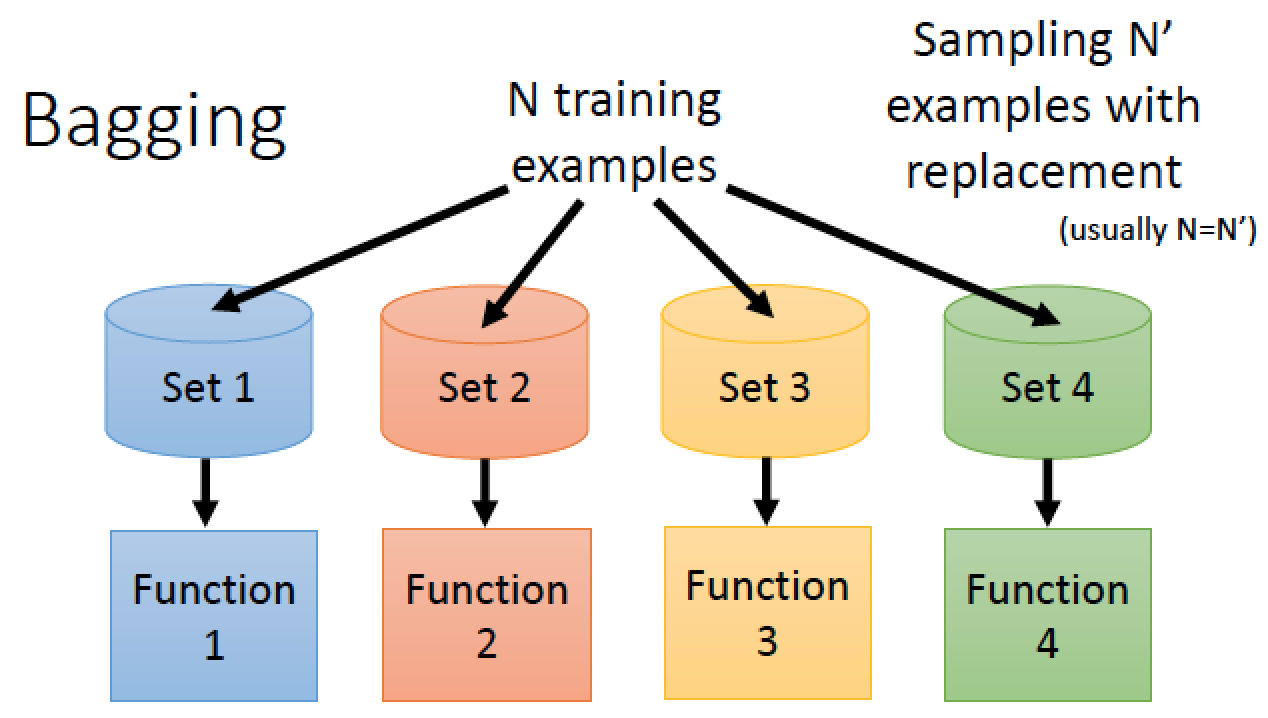

從 N 筆 training data 中，做 sampling 組成 M 個 dataset 每個 dataset 裡面有 N’ 筆資料
使用 sampling 的方法建出很多資料集，訓練出多個 function

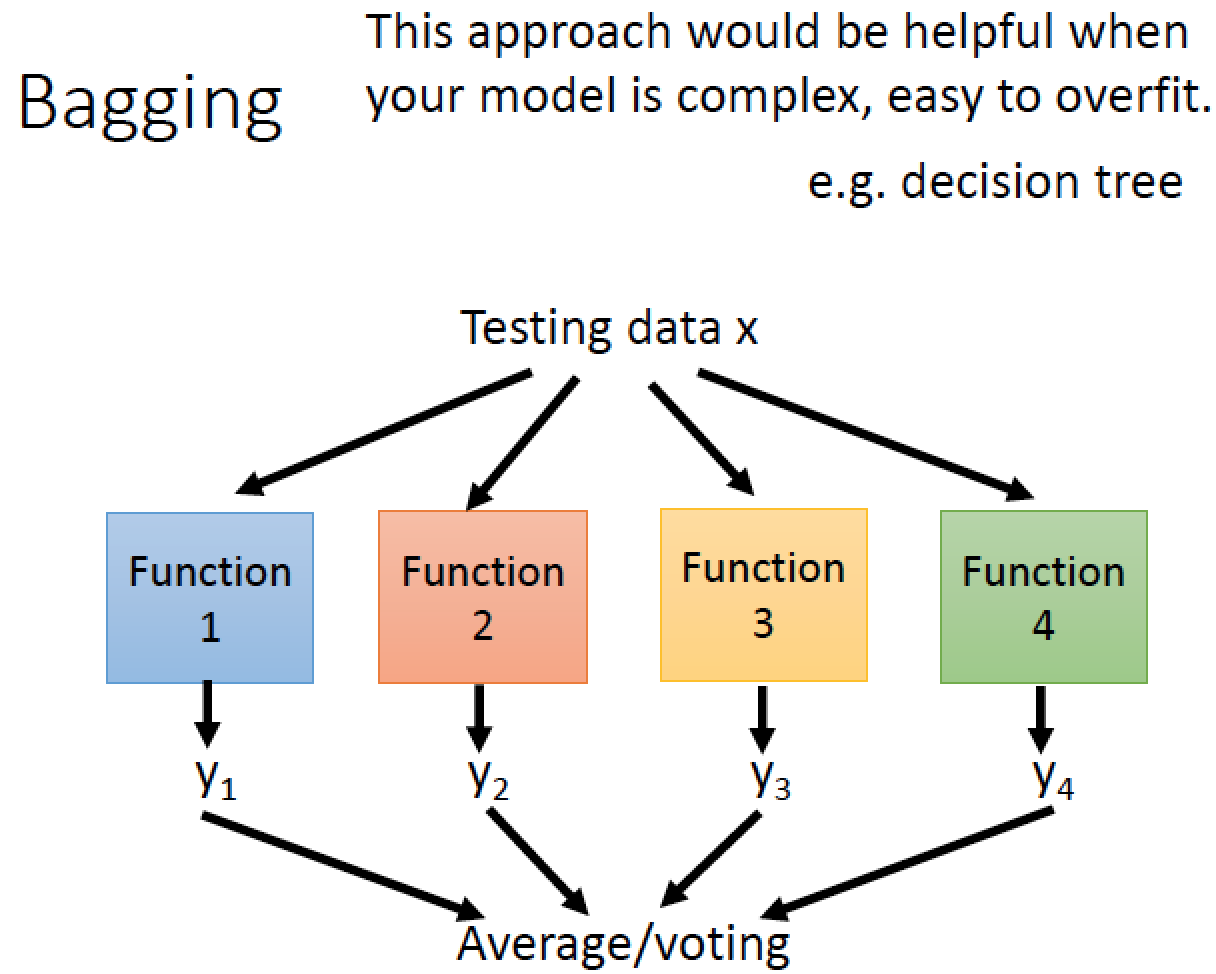

接著再把我們訓練出來的四個 function 跑出來得結果，拿出來整合，得到最後的結論
如果是 regression 問題，就把 functions output 做平均
如果是 classification 問題，就做 voting

註： bagging 是用在很強的 model

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
wine = load_wine()
X_train, X_test, Y_train, Y_test = train_test_split(wine.data,wine.target,test_size=0.3)

In [8]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(X_train,Y_train)
rfc = rfc.fit(X_train,Y_train)

score_c = clf.score(X_test,Y_test)
score_r = rfc.score(X_test,Y_test)

print(f"Single Tree:{score_c}\n"
    ,f"Random Forest:{score_r}"   
                                )

Single Tree:0.9074074074074074
 Random Forest:0.9814814814814815


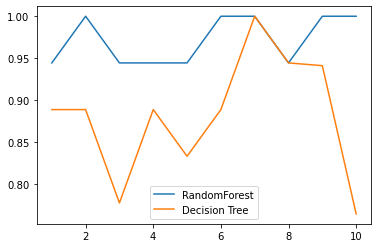

In [10]:
#總共切割十份(cv=10),每次取一份做測試集，剩下九份做訓練集
#交叉驗證來觀察模型穩定性
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

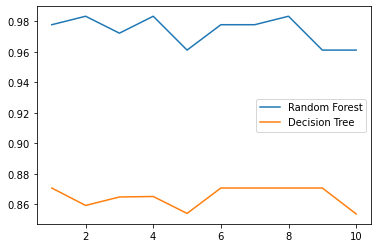

In [11]:
#十組交叉驗證比較
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

單個決策樹表現越好，隨機森林表現也會越好

**n_estimators**

這是森林中樹木的數量，即基基評估器的數量。這個參數對隨機森林模型的精確性影響是單調的，n_estimators越大，模型的效果往往越好。但是相應的，任何模型都有決策邊界，n_estimators達到一定的程度之後，隨機森林的精確性往往不在上升或開始波動，並且，n_estimators越大，需要的計算量和內存也越大，訓練的時間也會越來越長。對於這個參數，我們是渴望在訓練難度和模型效果之間取得平衡。

0.9888888888888889 34


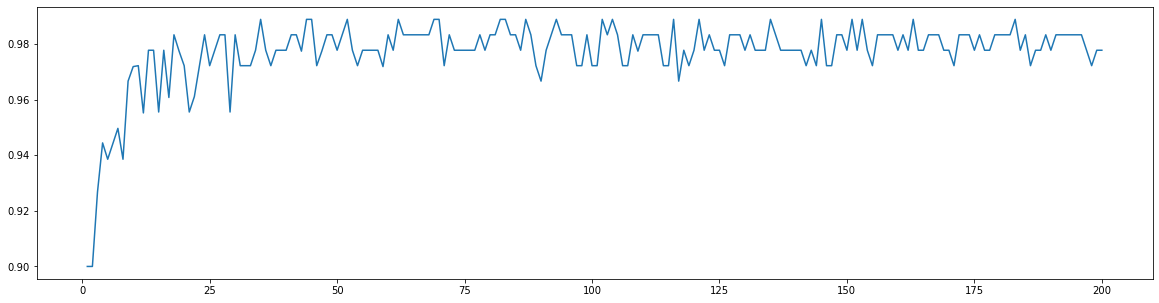

In [12]:
#觀察n_estimators的學習曲線以取得平衡
score = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1 #kernel有幾顆用幾顆
                                )
    rfc_score = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    score.append(rfc_score)
print(max(score),score.index(max(score)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201), score)
plt.show()

# 錯誤率判斷

In [16]:
#使用comb module
#The number of combinations of N things taken k at a time.
#n! /(k! *(n-k)! )
from scipy.special import comb
k = np.array([3, 4])
n = np.array([10, 10])
print(f' exact False: {comb(n, k, exact=False)}')

print(f' exact True: {comb(10, 3, exact=True)}')

 exact False: [120. 210.]
 exact True: 120


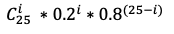

In [21]:
# 25棵樹，每棵樹錯誤的機率為0.2，則25棵樹判錯的機率為多少
for i in range(13,26):
    error_rate = np.array(comb(25,i)*(0.2**i)*((1-0.2)**(25-i))).sum()
error_rate

3.3554432000000048e-18

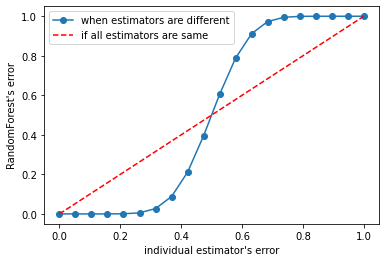

In [31]:
#基分類器的判斷準確率至少要超過隨機分類器，也就是說，基分類器的判斷準確率至少要超過50%

import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

# 隨機森林重要屬性

**.estimators_**

是用來查看隨機森林中所有樹的列表的

In [23]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(X_train, Y_train)

rfc.estimators_[0].random_state

1872583848

In [24]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


**.oob_score_**

袋外得分。隨機森林為了確保林中的每棵樹都不盡相同，所以採用了對訓練集進行有放回抽樣的方式來不斷組成信的訓練集，在這個過程中，會有一些數據從來沒有被隨機挑選到，他們就被叫做“袋外數據”。這些袋外數據，沒有被模型用來進行訓練，sklearn可以幫助我們用他們來測試模型，測試的結果就由這個屬性oob_score_來導出，本質還是模型的精確度。

In [25]:
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(X_train, Y_train)

rfc.oob_score_

0.9758064516129032

**.feature_importances_**

返回特徵的重要性

In [26]:
rfc.feature_importances_

array([0.10078105, 0.04022988, 0.02478616, 0.03569962, 0.02306088,
       0.07140753, 0.07295127, 0.01257706, 0.01138542, 0.18290053,
       0.11443135, 0.12121143, 0.18857782])

In [29]:
print(f'在{rfc.apply(X_test).shape[1]}棵樹上，共有{rfc.apply(X_test).shape[0]}個index')
rfc.apply(X_test)

在25棵樹上，共有54個index


array([[ 7,  3,  3, ...,  6,  8,  3],
       [ 3,  3,  3, ...,  6,  3,  7],
       [ 4,  6,  6, ...,  7, 10,  7],
       ...,
       [15, 14, 12, ..., 11, 15,  9],
       [18, 14, 12, ..., 11, 15,  9],
       [18, 14, 12, ..., 11, 15,  9]])

In [30]:
rfc.predict_proba(X_test)

array([[0.  , 0.28, 0.72],
       [0.  , 0.84, 0.16],
       [0.  , 0.92, 0.08],
       [0.12, 0.88, 0.  ],
       [0.24, 0.72, 0.04],
       [0.  , 0.16, 0.84],
       [0.12, 0.2 , 0.68],
       [0.04, 0.08, 0.88],
       [0.84, 0.12, 0.04],
       [0.  , 0.8 , 0.2 ],
       [0.04, 0.  , 0.96],
       [0.  , 0.88, 0.12],
       [0.04, 0.36, 0.6 ],
       [0.04, 0.2 , 0.76],
       [0.08, 0.92, 0.  ],
       [0.08, 0.08, 0.84],
       [0.96, 0.04, 0.  ],
       [0.16, 0.12, 0.72],
       [0.  , 0.96, 0.04],
       [0.  , 0.84, 0.16],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.44, 0.36, 0.2 ],
       [0.08, 0.12, 0.8 ],
       [0.12, 0.24, 0.64],
       [0.  , 1.  , 0.  ],
       [0.04, 0.88, 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 1.  , 0.  ],
       [0.08, 0.08, 0.84],
       [0.12, 0.08, 0.8 ],
       [0.2 , 0.76, 0.04],
       [0.08, 0.8 , 0.12],
       [0.04, 0.84, 0.12],
       [0.  , 0.  , 1.  ],
 